In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [4]:
df = df.explode('008')

In [5]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [6]:
df.sample(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20172879162,170207s2016 xr ab e p 001 0 cze,[978-80-245-2162-6],"[Kč 327,00]",[(brožováno) :],[cze],None,[0],None,"[378, 37.016]","[Vysoké školy, Učební osnovy. Vyučovací předmě...","[378.2, 17:001.811, (075.8)]",[aut],[vse2014836960],"[Radváková, Věra]",None,None,[Základy odborné práce /],"[Věra Radváková, Tomáš Sigmund]",None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Oeconomica, nakladatelství VŠE,]",[2016],[1],[125 stran :],"[ilustrace, mapy ;]",[25 cm],None,None,[Na obálce nad názvem: Fakulta informatiky a s...,None,None,None,[Anglické resumé],None,"[odborné písemné práce, informační etika, prof...",None,None,None,None,None,"[učebnice vysokých škol, textbooks (higher)]",[aut],[vse2015871538],"[Sigmund, Tomáš]",None,[pbl],[kn20010709399],[Vysoká škola ekonomická v Praze.],[Fakulta informatiky a statistiky],None,None,None,nam a22 i 4500,2016.0
nkc20112194350,110531s2011 xr a e p 000 0 cze,[978-80-7375-510-2],None,[(brož.)],None,None,None,None,"[637, 37.016]","[Živočišné produkty, Učební osnovy. Vyučovací ...","[637.5.03, 637.5, 663/664-021.465, (075.8)]",[aut],[jn20000401163],"[Ingr, Ivo,]",[1936-2016],None,[Produkce a zpracování masa /],[Ivo Ingr],None,None,None,"[Vyd. 2., nezměn.]",None,[V Brně :],"[Mendelova univerzita,]",[2011],None,None,None,None,None,None,None,[202 s. :],[il. ;],[30 cm],None,None,"[Na obálce nad názvem: Agronomická fakulta, 15...",None,None,None,None,None,"[zpracování masa, maso, kvalita potravin, meat...",None,None,None,None,None,"[učebnice vysokých škol, textbooks (higher)]",None,None,None,None,None,[ko2010564124],[Mendelova univerzita.],[Agronomická fakulta],None,None,None,nam a22 a 4500,2011.0
nkc20112179002,110329s2011 xr g 000 f cze,[978-80-7381-900-2],None,[(váz.)],[cze],[eng],[1],None,[821.111(73)-3],[Americká próza],"[821.111(73)-31, (0:82-311.9)]",[aut],[xx0089961],"[Robinson, Jeremy,]",[1974-],None,[Zóna nebezpečí /],[Jeremy Robinson ; přeložil Jiří Špalek],None,None,None,[1. vyd. v českém jazyce],None,[Praha :],"[BB/art,]",[2011],None,None,None,None,None,None,None,[349 s. ;],None,[22 cm],None,None,"[Přeloženo z angličtiny, Obálkový podnázev: ko...",None,None,None,None,None,None,None,None,None,None,None,"[americké romány, vědecko-fantastické romány, ...",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2011.0
bk196504279,971112s1965 xr e f 00| 0 cze,None,None,None,None,None,None,None,[82],[Literatura. Literární život],"[82:37.016, (072)]",[aut],[jk01092019],"[Pavel, Bohumil,]",[1912-],None,[Metodická příručka k Čítance pro devátý roční...,"[Bohumil Pavel, Danuše Ročková, Karel Dvořák]",None,None,None,[2. vyd.],None,[Praha :],"[SPN,]",[1965],None,[(Rudé právo)],None,None,None,None,None,[54 s. ;],None,[8°],[Pomocné knihy pro učitele],None,[1500 výt.],None,None,None,None,None,[literární výchova],None,None,None,None,None,[metodické příručky],"[aut, aut]","[jk01030156, jx20040622025]","[Dvořák, Karel,, Ročková, Danuše]","[1913-1989, None]",None,None,None,None,[Pomocné knihy pro učitele],None,None,nam a22 1 4500,1965.0
np9536576,950116s1994 xr g e 000 0 cze,[80-210-1047-9],None,[(brož.)],"[cze, eng, ger]",None,[0],None,[78],[Hudba],"[78, 316.7]",None,None,None,None,None,[Colloquium Musica ac societas (1740-1815) :],[editor Petr Macek],None,None,[Musica ac societas (1740-1815)],[Vyd. 1.],None,[Brno :],"[Filozofická fakulta Masarykovy univerzity,]",[1994],None,None,None,None,None,None,None,[206 s. ;],None,[24 cm],[Musikwissenschaftliche Kolloquien der Interna...,[Bd. 24],"[Čes., něm. a angl. text

In [7]:
preklady = df.explode('041_h')
preklady = preklady[(preklady['041_h'].notnull()) & (preklady['041_h'] != 'cze')]

## Podíl překladové literatury (spíš v datech než v realitě)

<Axes: xlabel='rok'>

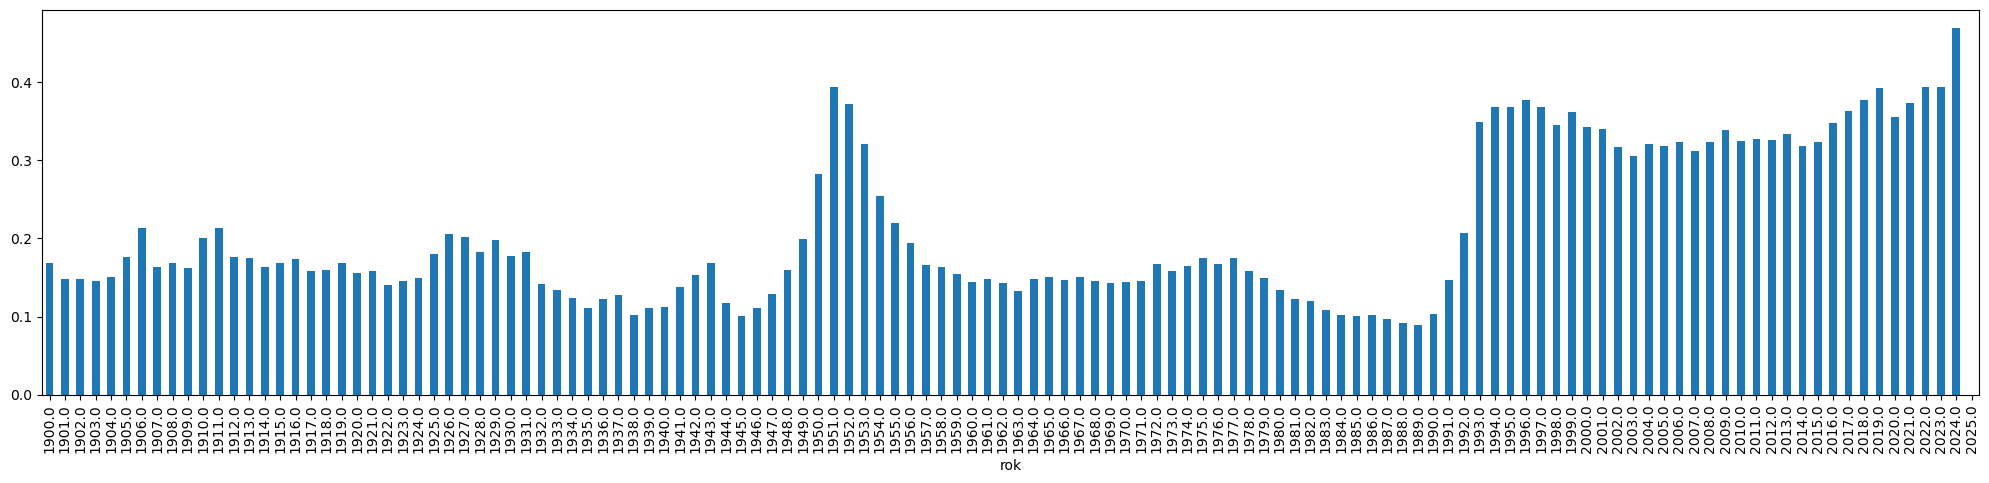

In [9]:
(preklady.groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

## Jednotlivé jazyky

In [11]:
preklady.groupby('041_h').size().nlargest(20)

041_h
eng    91093
ger    44461
rus    20829
fre    17380
pol     4553
ita     4304
slo     4275
und     3858
spa     3476
lat     2139
mul     1821
swe     1773
dut     1226
hun     1192
nor      995
grc      970
dan      881
jpn      689
bul      609
chi      536
dtype: int64

<Axes: xlabel='rok'>

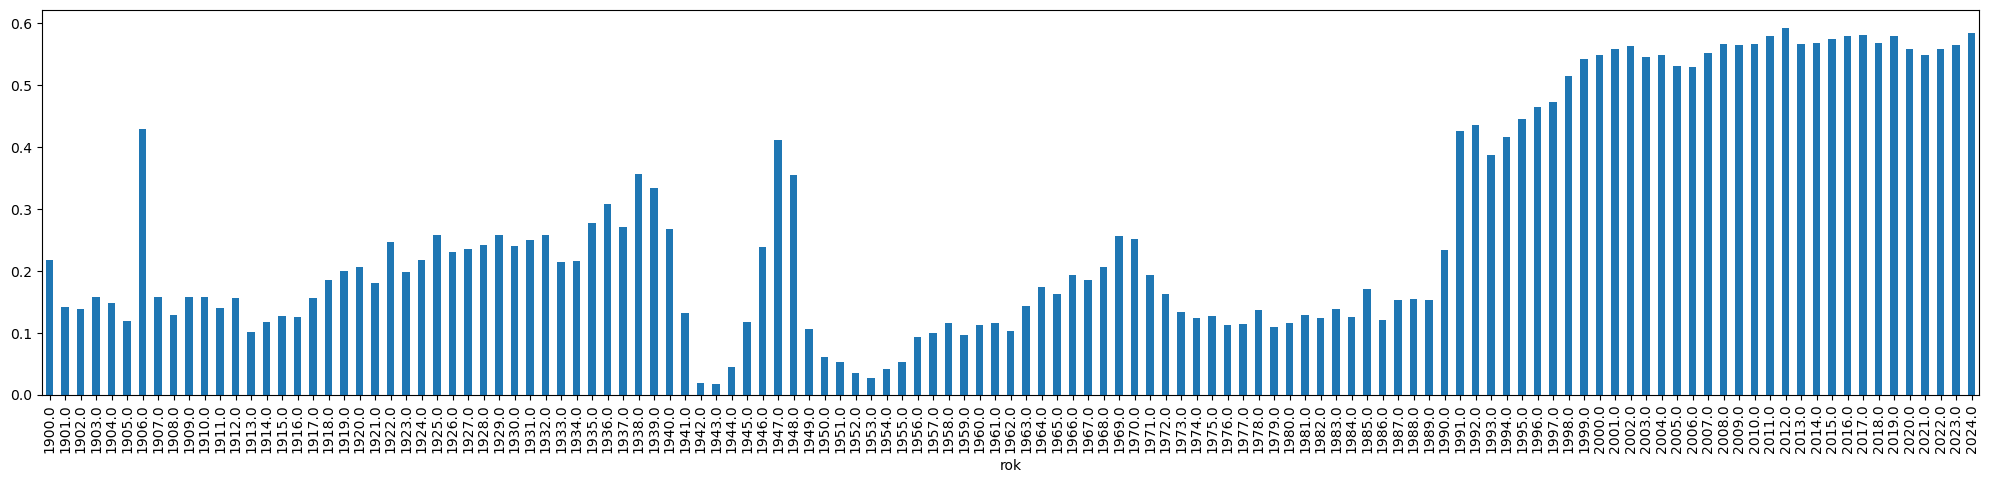

In [12]:
(preklady[preklady['041_h'] == 'eng'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

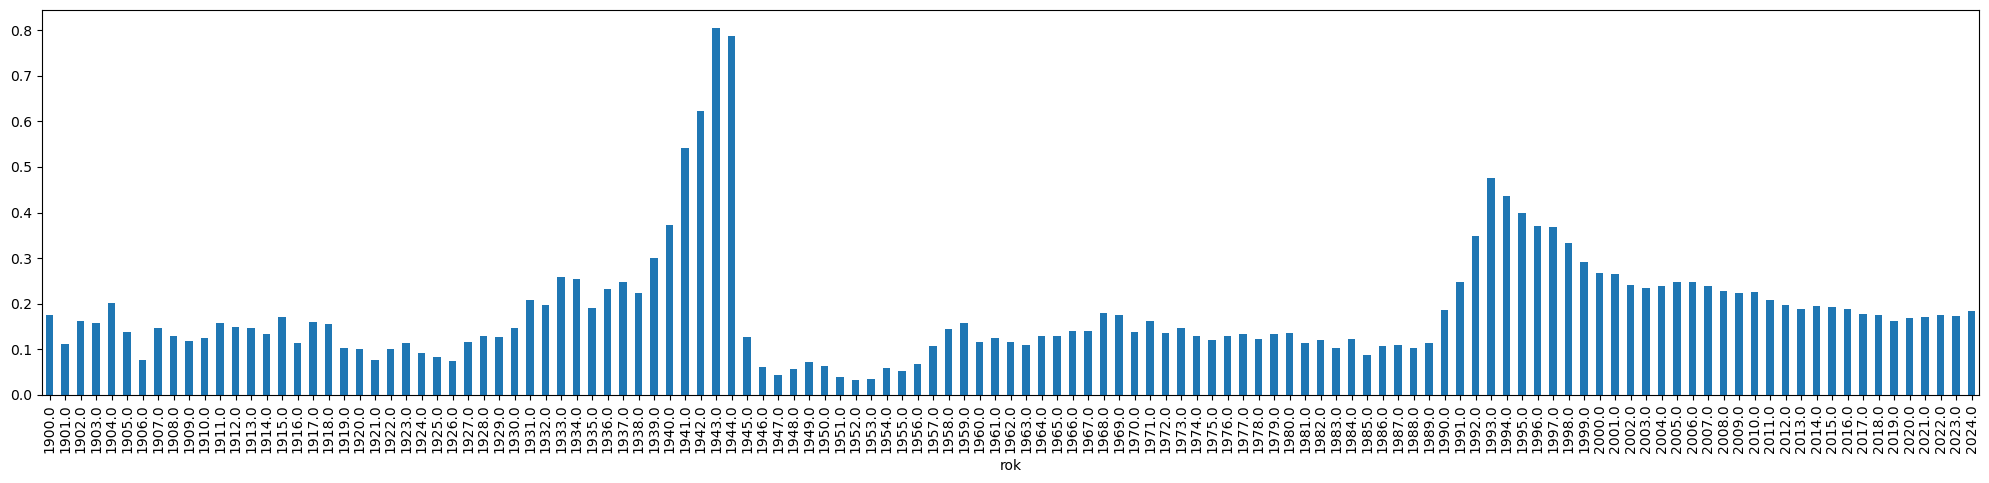

In [13]:
(preklady[preklady['041_h'] == 'ger'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

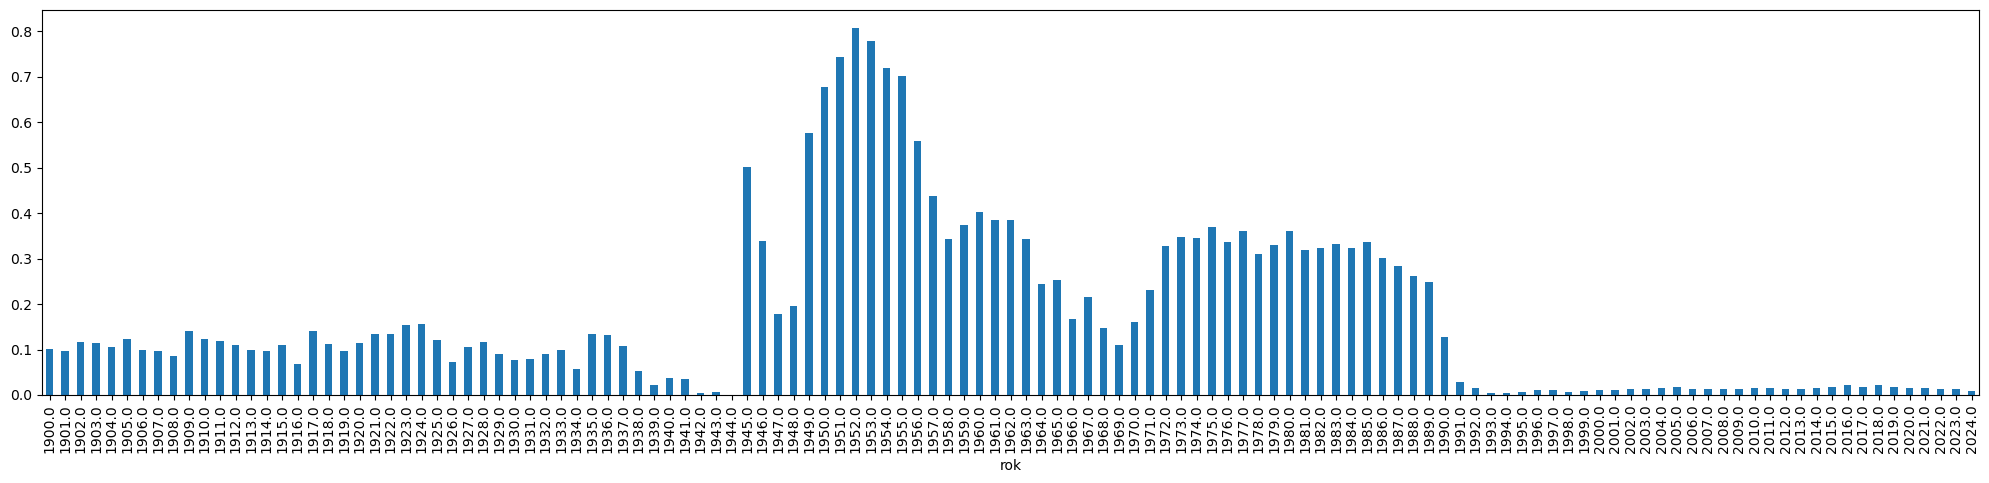

In [14]:
(preklady[preklady['041_h'] == 'rus'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

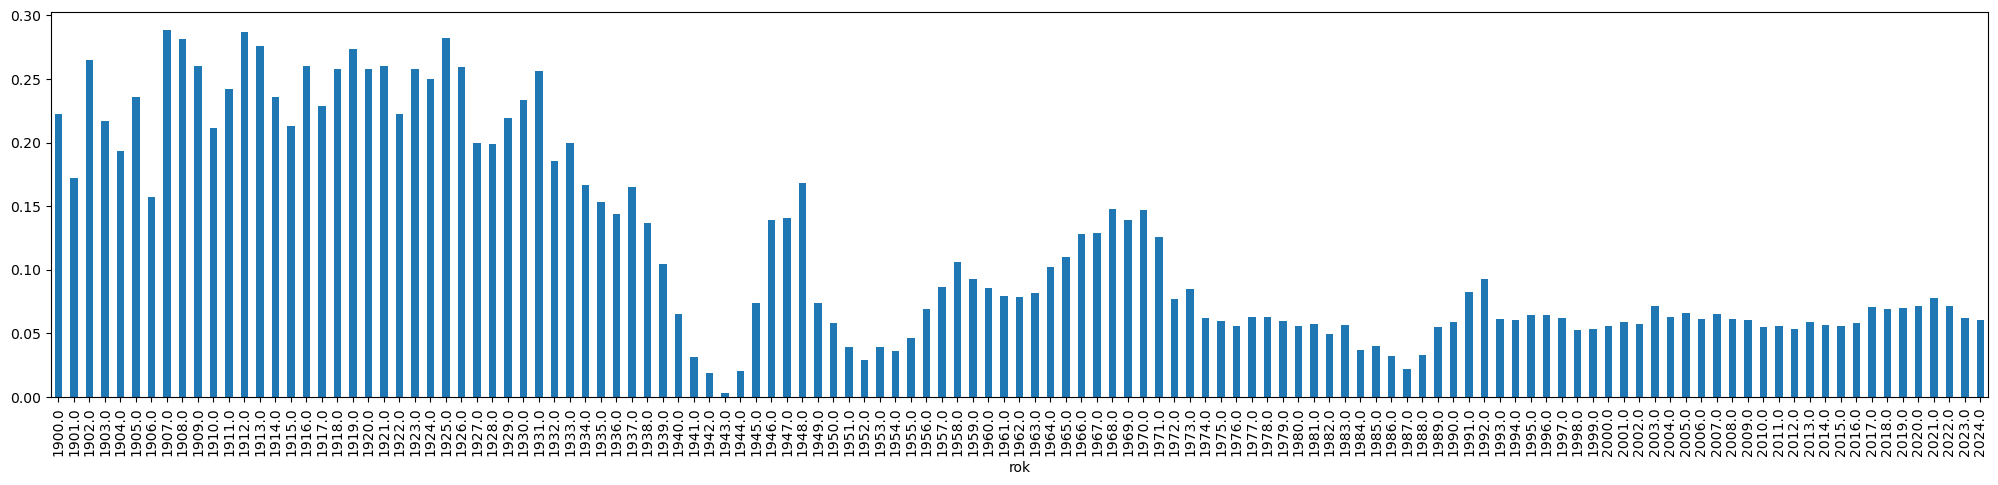

In [15]:
(preklady[preklady['041_h'] == 'fre'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

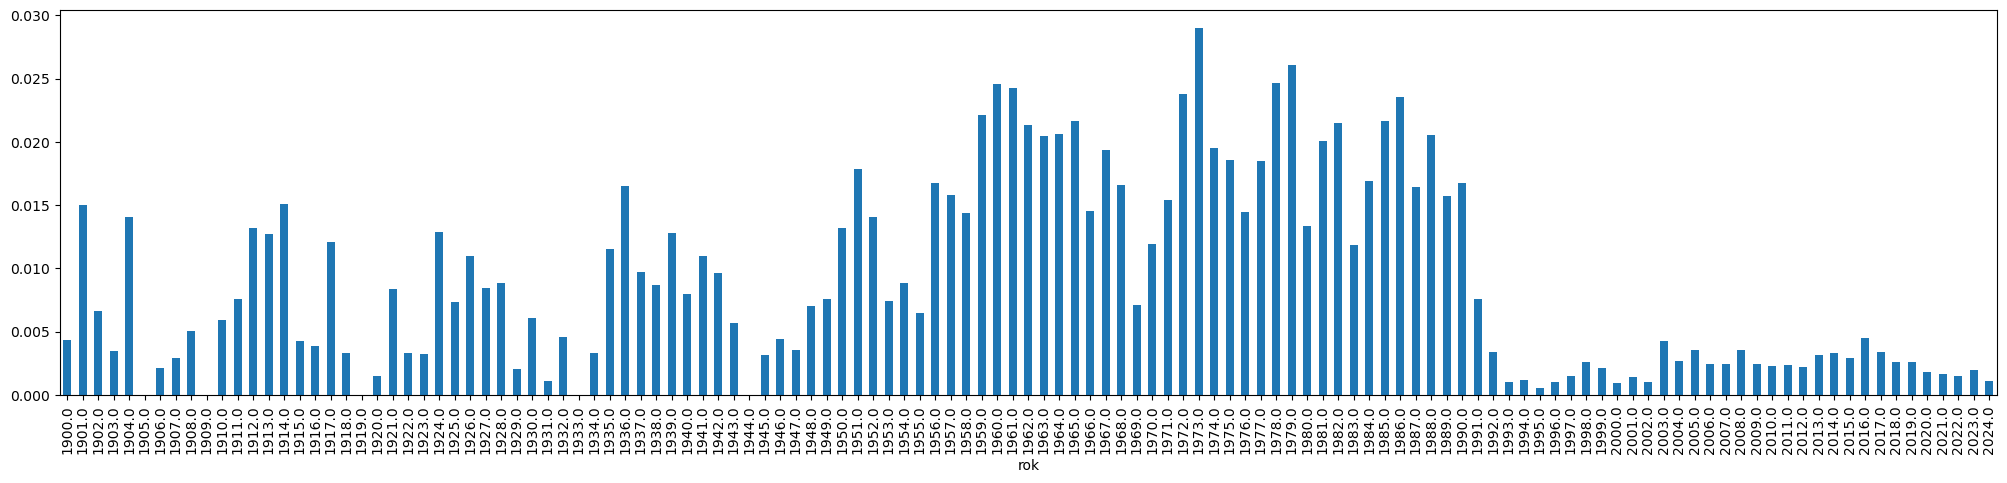

In [16]:
(preklady[preklady['041_h'] == 'hun'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

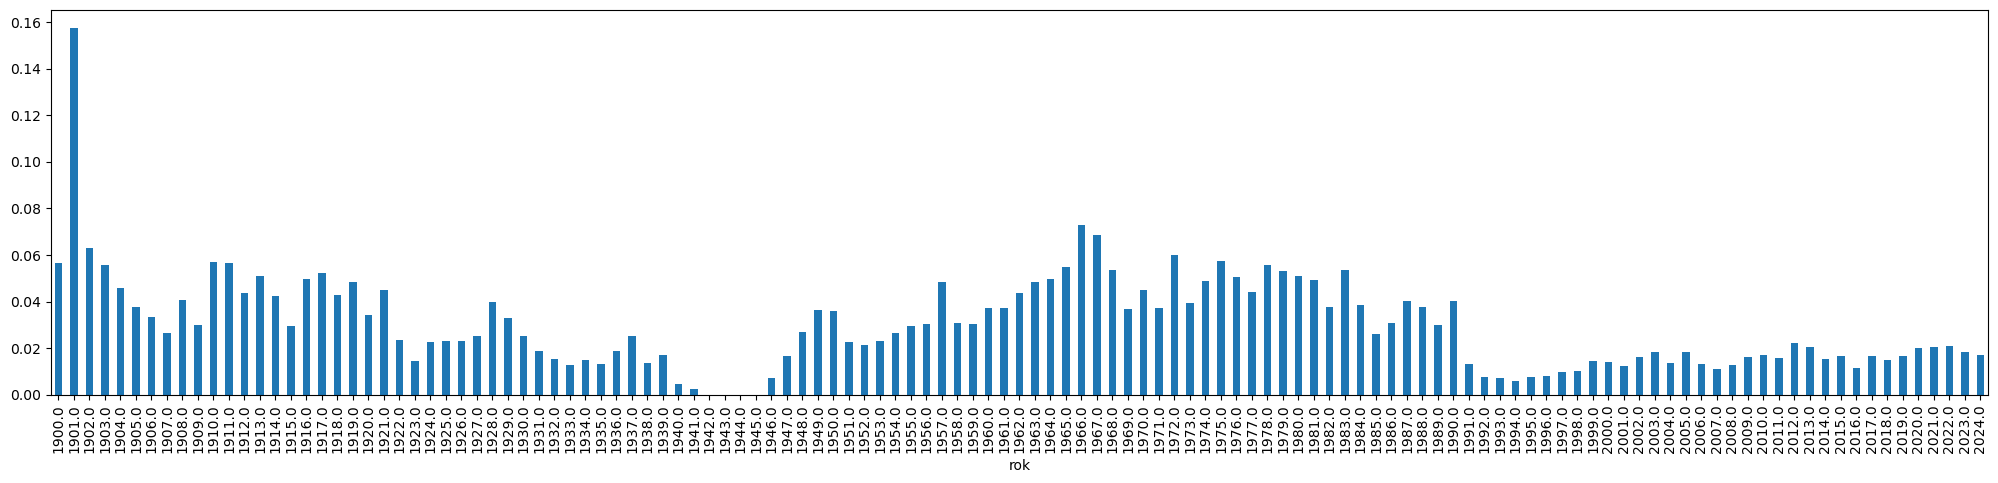

In [17]:
(preklady[preklady['041_h'] == 'pol'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

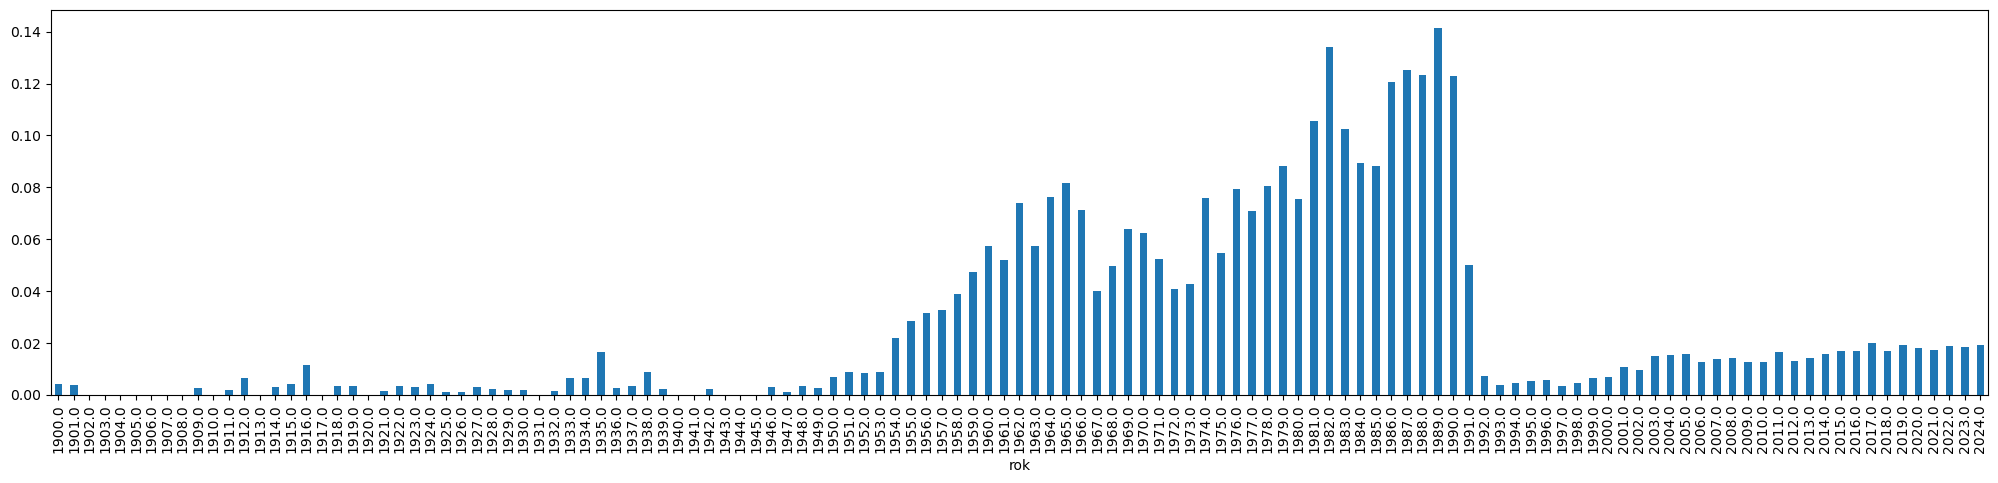

In [18]:
(preklady[preklady['041_h'] == 'slo'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

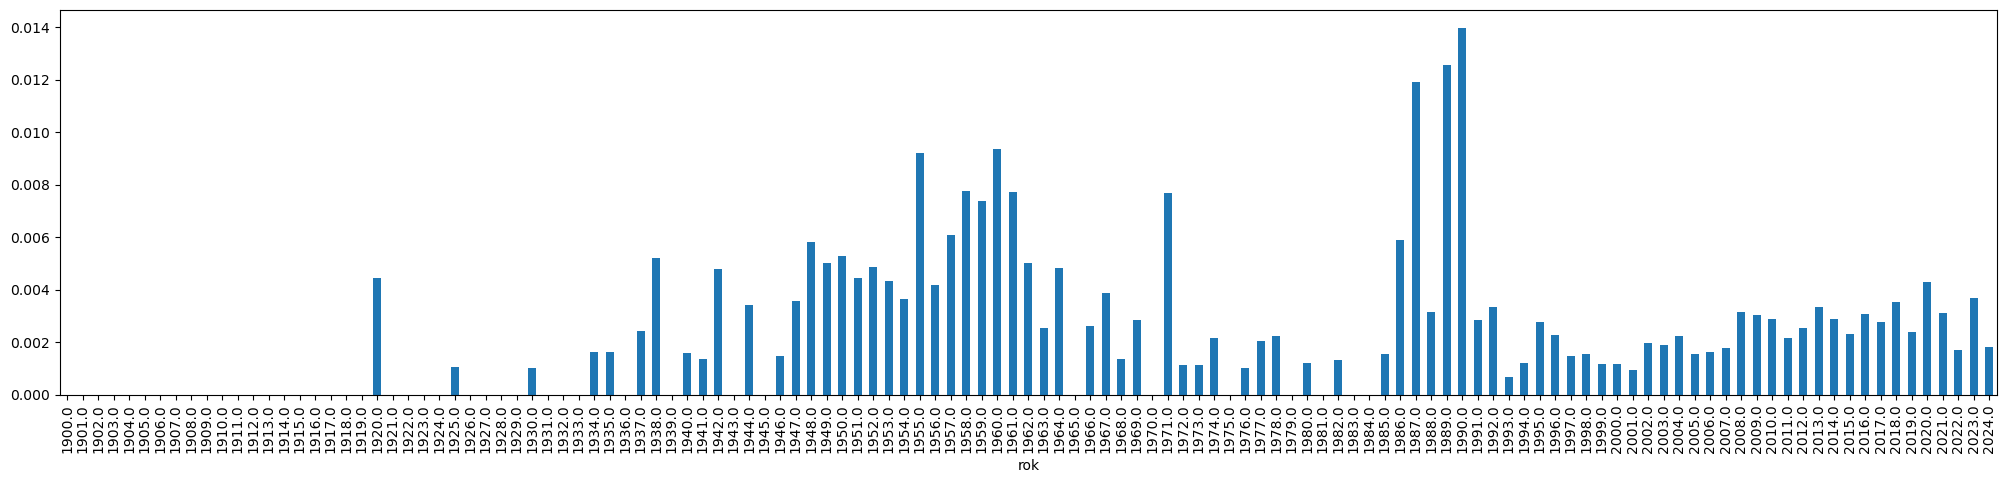

In [19]:
(preklady[preklady['041_h'] == 'chi'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

## První překlady

In [21]:
preklady[['rok','041_h','100_a','245_a']].sort_values(by='rok').groupby('041_h').first().sort_values(by='rok')

,rok,100_a,245_a
041_h,,,
lat,1900.0,"[Bělohubek, August]",[Listář královského věnného města Chrudimi.]
dan,1900.0,"[Drachmann, Holger,]",[Byl jednou jeden král-- :]
eng,1900.0,"[Clark, Albert Warren,]",[Zítra /]
epo,1900.0,"[Zamenhof, Ludwik,]",[Mezinárodní řeč Esperanto :]
fre,1900.0,"[Maupassant, Guy de,]",[Dědictví /]
ger,1900.0,"[Külpe, Oswald,]",[Úvod do filosofie /]
swe,1900.0,"[Leffler, Anne Charlotte,]",[Soňa Kovalevská :]
heb,1900.0,"[Kämpf, Saul Isaac,]","[Biblí svatá, aneb, Všecka svatá písma Starého..."
spa,1900.0,"[Calderón de la Barca, Pedro,]",[Lékař své cti :]


In [22]:
df[df['245_a'].astype(str).str.contains('Čínské recepty v české kuchyni',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19990704624,990831q1997199 xr f e f 000 | cze,[80-86132-13-7],"[Kč 89,00]",[(brož.) :],[cze],[slo],[1],None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.55(083.12), 641/642, (510), (437.3), (083...",[aut],[xx0001238],"[Horecká, Jana]",None,None,[Čínské recepty v české kuchyni /],[Jana Horecká],None,None,None,None,None,[Ostrava :],"[Knižní expres,]",[[1999?]],None,None,None,None,None,None,None,"[119 s., [8] s. barev. obr. příl. ;]",None,[20 cm],[Recepty šikovné hospodyňky],None,[Překlad ze slovenštiny Elfrída Nacherová ; fo...,None,None,None,None,None,"[kuchařské recepty, kuchyně, cooking recipes, ...",None,None,"[Čína, Česko, China, Czechia]",None,None,"[kuchařské recepty, cookbooks]",None,None,None,None,None,None,None,None,[Recepty šikovné hospodyňky],None,None,nam a22 a 4500,NaN
cpk20041278387,040330s2003 xr af e 000 0 cze,"[80-86132-76-5, 80-86132-77-3]",None,"[(váz.), (brož.)]",[cze],[slo],[1],None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.568(510), (083.12)]",[aut],[xx0001238],"[Horecká, Jana]",None,None,[Čínské recepty v české kuchyni /],[Jana Horecká],None,None,None,[2. vyd.],None,[Ostrava :],"[Knižní expres,]",[[2003]],None,None,None,None,None,None,None,"[104 s., [8] s. barev. obr. příl. :]",[il. ;],[22 cm],[Prima recepty],None,[Překlad ze slovenštiny],None,None,None,None,None,"[čínská jídla, Chinese cookery]",None,None,None,None,None,"[kuchařské recepty, cookbooks]",None,None,None,None,None,None,None,None,[Prima recepty],None,None,nam a22 a 4500,2003.0
